<a href="https://colab.research.google.com/github/danzbz/VehiclePriceAI/blob/main/RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


data = pd.read_csv('1.04. Real-life example.csv')

##Análise Exploratória

In [2]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


Quais são os atributos?
- **Brand:** A marca do carro.
- **Body:** Tipo de carroceria.
- **Mileage:** Quilometragem percorrida pelo carro.
- **EngineV:** Versão do motor.
- **Engine Type:** Tipo de motor (combustivel).
- **Registration:** Indica se o carro é registrado ou não.
- **Year:** Ano de fabricação do carro.
- **Model:** Modelo do carro.

**Qual o rótulo da amostra?**
- **Price:** O preço do carro em dolar.

In [4]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
data.shape

(4345, 9)

**Verifico as colunas que possuem valor nulo**

In [6]:
valores_nulo = data.isnull().sum()
print (valores_nulo)

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64


**Verifico em percentual**

In [7]:
print((valores_nulo / len(data)) * 100)

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
Model           0.000000
dtype: float64


**Optamos por tratar os valores nulos nesse momento para nao impacatar na analise exploratória**

**Possiveis insights para a tratativa de valores nulo:**

1.   Preencher com a média.
2.   Preencher com a mediana.
3.   Excluir linha.


Opção escolhida e motivo:

**Excluir linha**: Pelo fato dos valores nas duas colunas faltante representarem menos de 4% dos dados.


In [8]:
data = data.dropna()

print(data.isnull().sum())

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64


**Contagem de categorias para variáveis categóricas**

In [9]:
print(Counter(data['Brand']))
print(Counter(data['Body']))
print(Counter(data['Engine Type']))
print(Counter(data['Registration']))

Counter({'Volkswagen': 880, 'Mercedes-Benz': 823, 'BMW': 640, 'Toyota': 510, 'Renault': 445, 'Audi': 420, 'Mitsubishi': 307})
Counter({'sedan': 1534, 'crossover': 824, 'van': 626, 'other': 394, 'vagon': 379, 'hatch': 268})
Counter({'Diesel': 1861, 'Petrol': 1468, 'Gas': 590, 'Other': 106})
Counter({'yes': 3654, 'no': 371})


**Boxplots das variáveis numéricas divididas por categorias**

Text(0.5, 1.0, 'Distribuição do Preço por Registro')

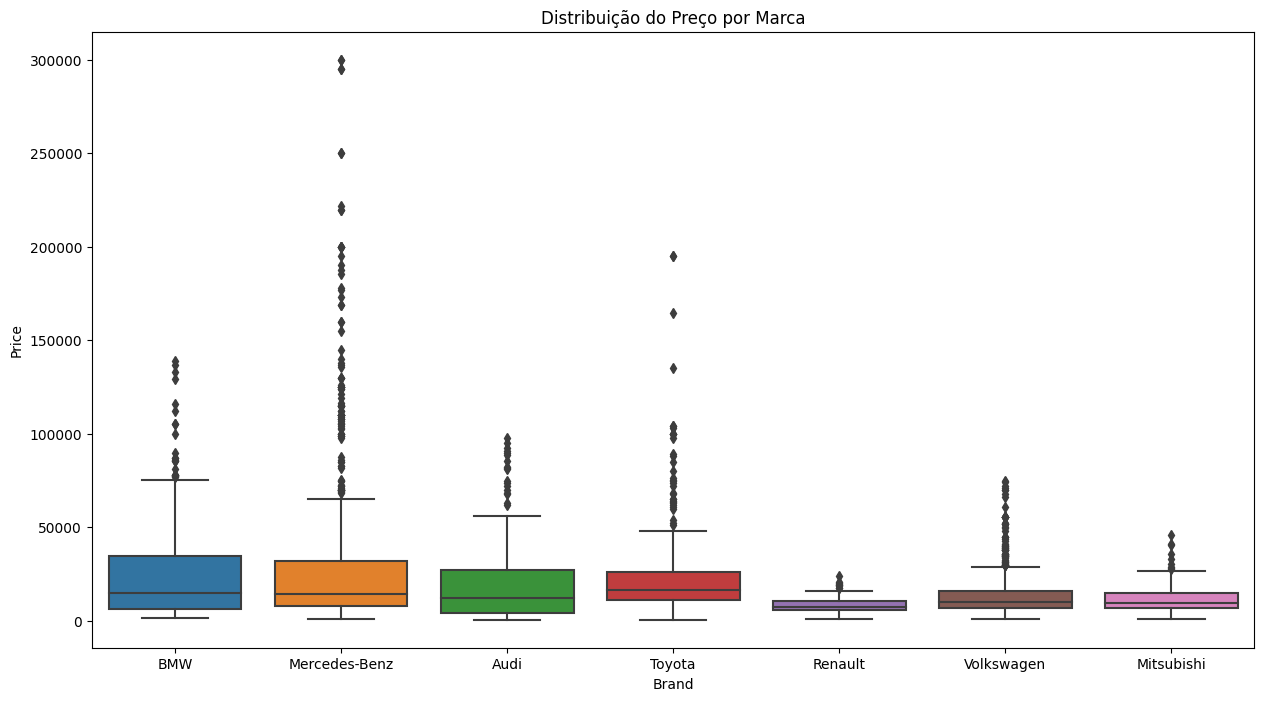

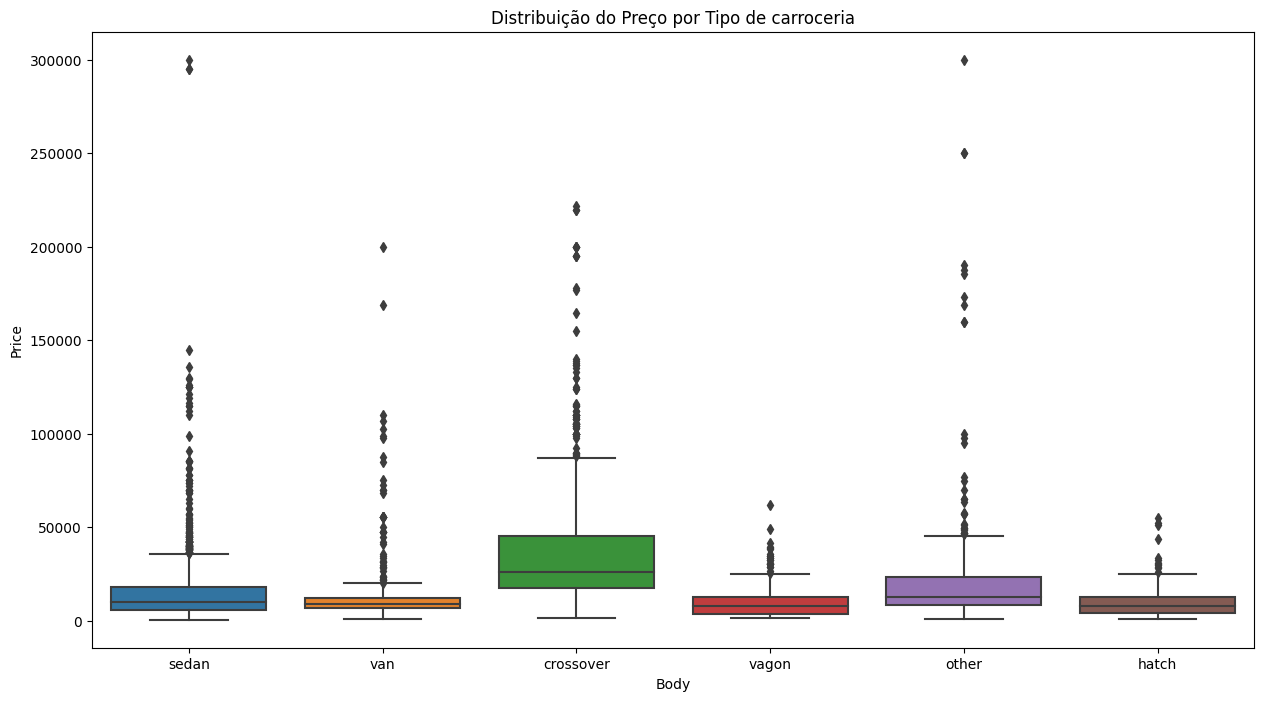

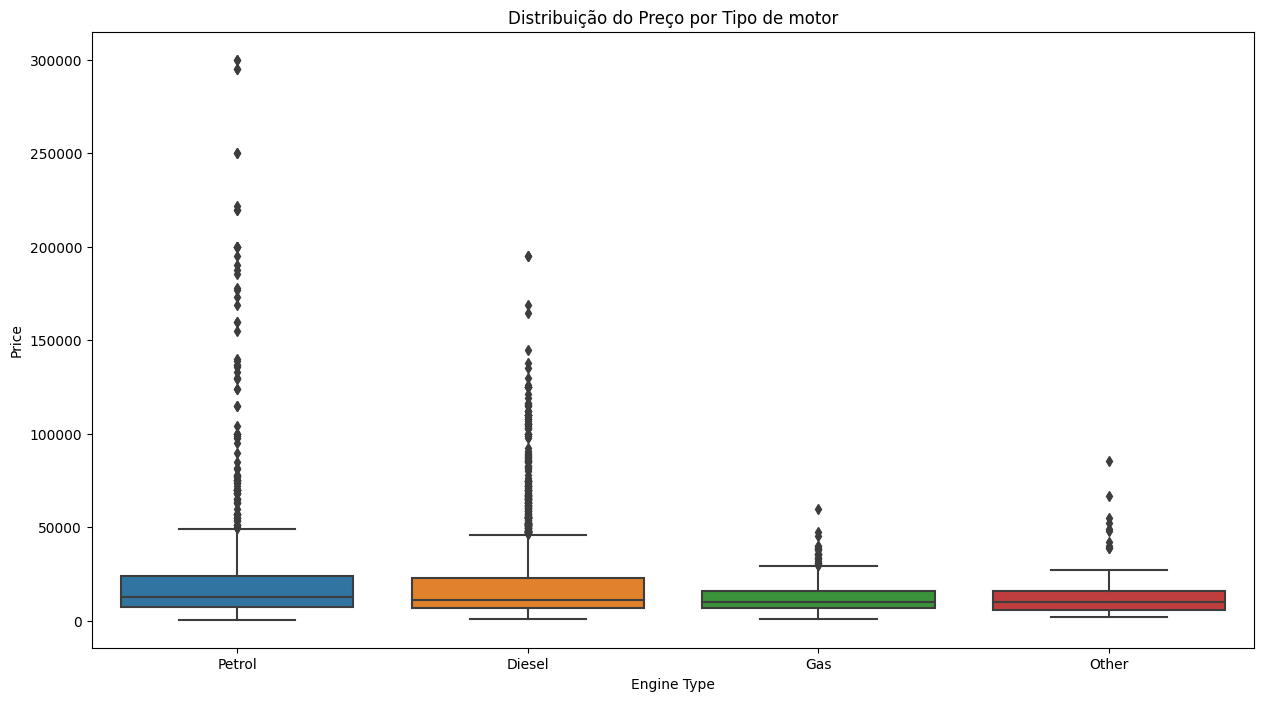

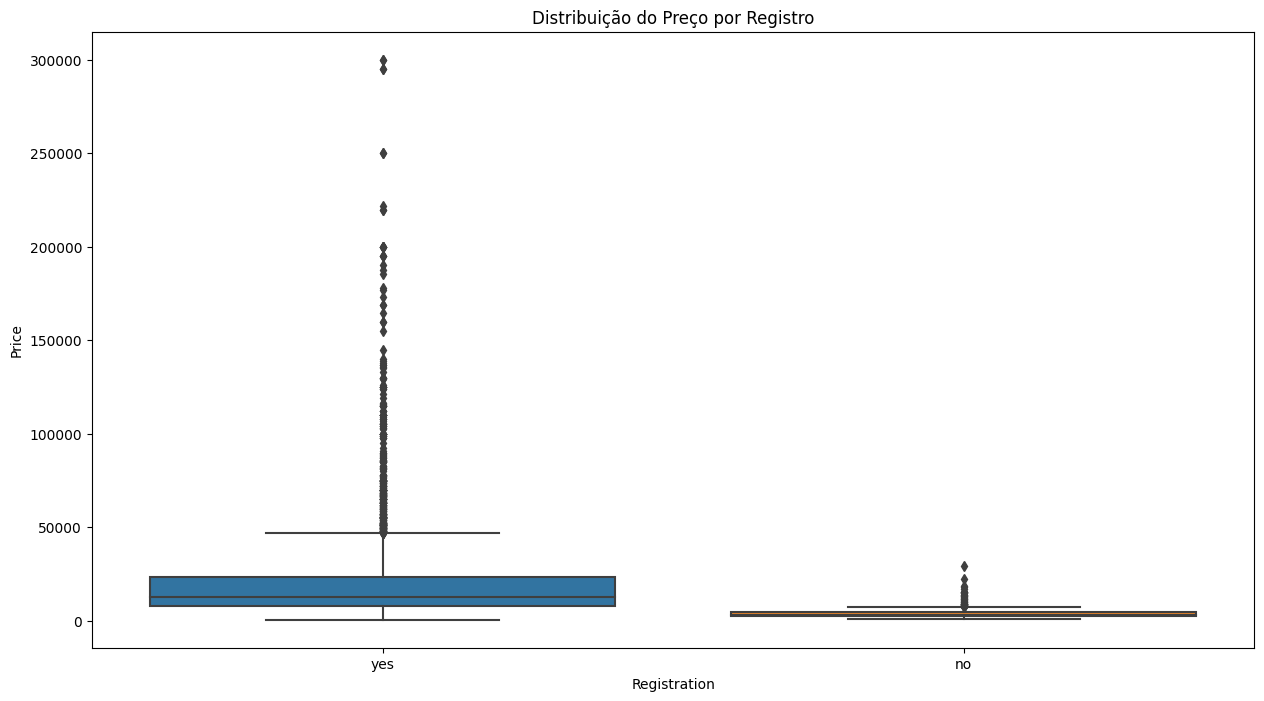

In [10]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Brand', y='Price', data=data)
plt.title('Distribuição do Preço por Marca')

plt.figure(figsize=(15, 8))
sns.boxplot(x='Body', y='Price', data=data)
plt.title('Distribuição do Preço por Tipo de carroceria')

plt.figure(figsize=(15, 8))
sns.boxplot(x='Engine Type', y='Price', data=data)
plt.title('Distribuição do Preço por Tipo de motor')

plt.figure(figsize=(15, 8))
sns.boxplot(x='Registration', y='Price', data=data)
plt.title('Distribuição do Preço por Registro')

**Conclusão com os dados do Boxplot**:

Brand: A marca com mais carros é a Mercedes-Benz (823), seguida pela Volkswagen (880) e BMW (640).
Body: Sedans são os mais comuns (1534), seguidos por crossovers (824) e vans (626).
Engine Type: Diesel é o tipo de motor mais frequente (1861), seguido por Petrol (gasolina) (1468) e Gas (gás) (590).
Registration: A grande maioria dos carros está registrado (yes: 3654).


**Boxplots das variáveis numéricas divididas por categorias:**

O boxplot do Price por Brand mostra uma grande variação de preços entre as marcas. Algumas marcas, como Mercedes-Benz e BMW, têm uma faixa de preço mais ampla com muitos **outliers de alto custo**.

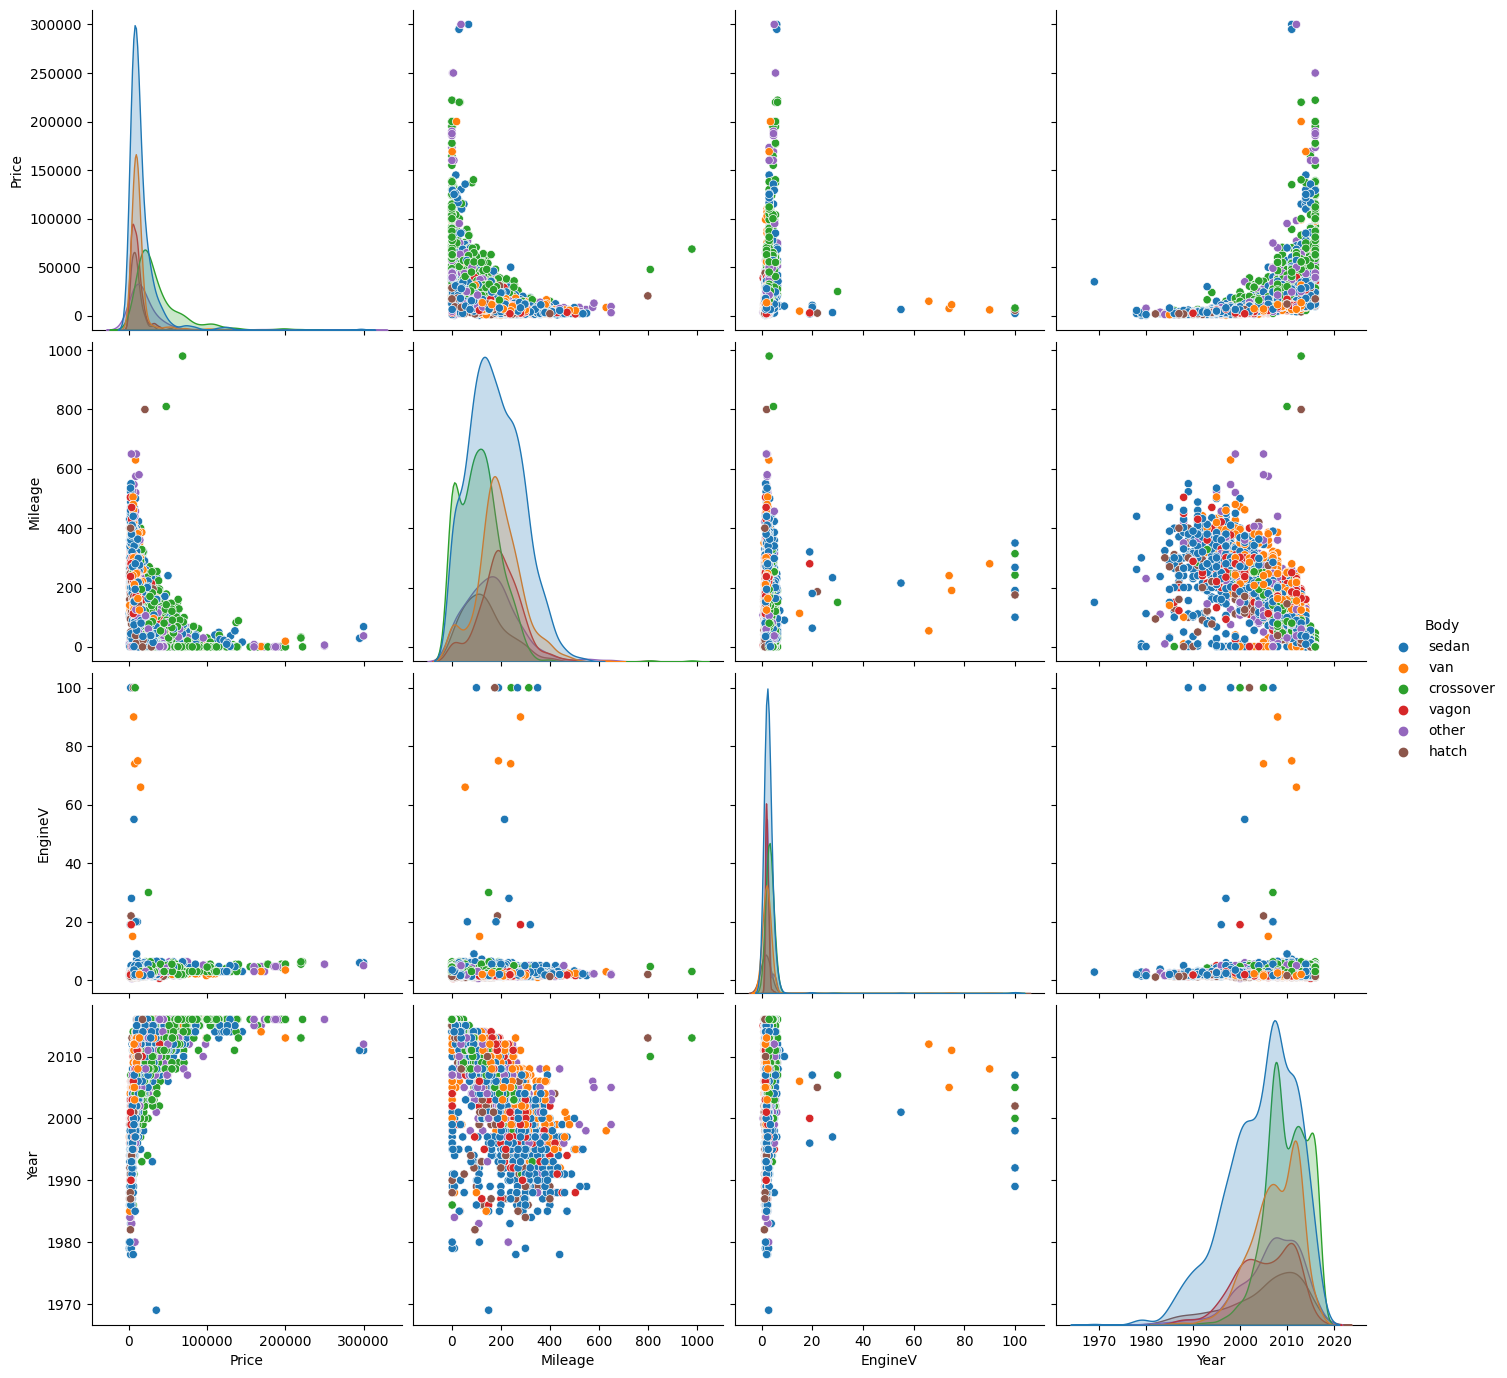

In [11]:
sns.pairplot(data, hue='Body', height=3.5);

Analisando os gráficos a gente visualizou que:
1.   A relação entre Price e Year sugere que carros mais novos tendem a ser mais caros.
2.   Price e Mileage mostram que carros com menor quilometragem tendem a ter preços mais altos.

**Gráficos de dispersão:**

Text(0.5, 1.0, 'Preço vs Ano')

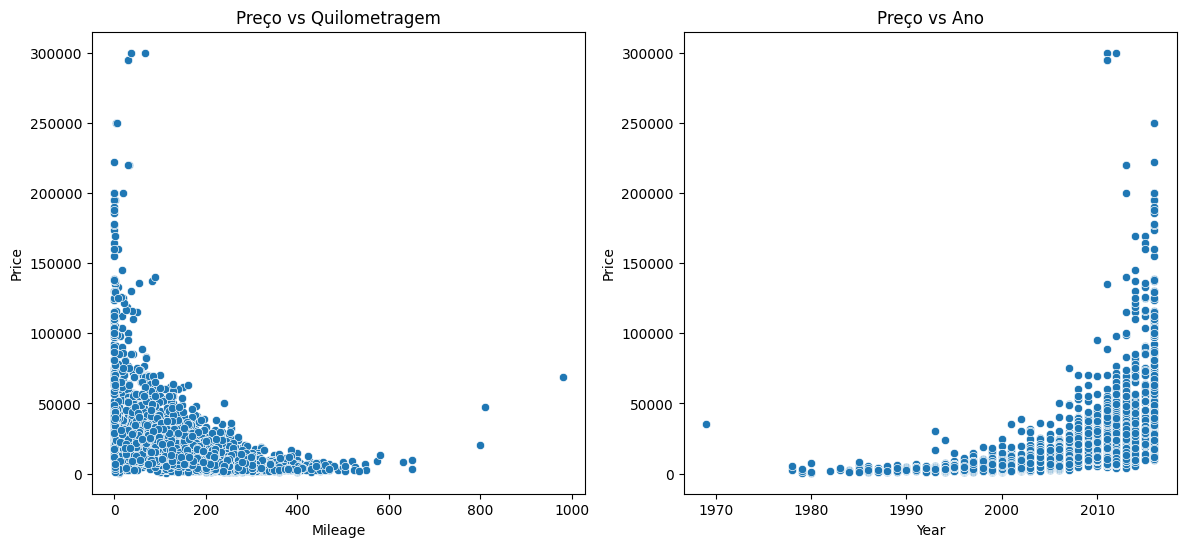

In [12]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Mileage', y='Price', data=data)
plt.title('Preço vs Quilometragem')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Year', y='Price', data=data)
plt.title('Preço vs Ano')

<Axes: title={'center': 'Histograma do Preço'}>

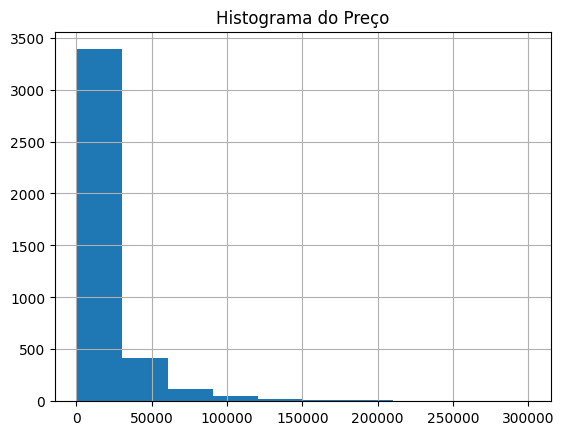

In [13]:
plt.title('Histograma do Preço')
data['Price'].hist()

Visualizando o histograma, da para perceber qu possui valores muito distante (no final do gráfico a direita) com valores muito grande se avaliado com os demais (media e moda, visivelmente).

Indicando a **OUTLIERS**. Esses dados podem ser carros de fato que possuem um valor elevado (carros de luxo) ou dados que possuem insserção errada na base de dados.

Text(0.5, 1.0, 'Quantidade de carros por Marca')

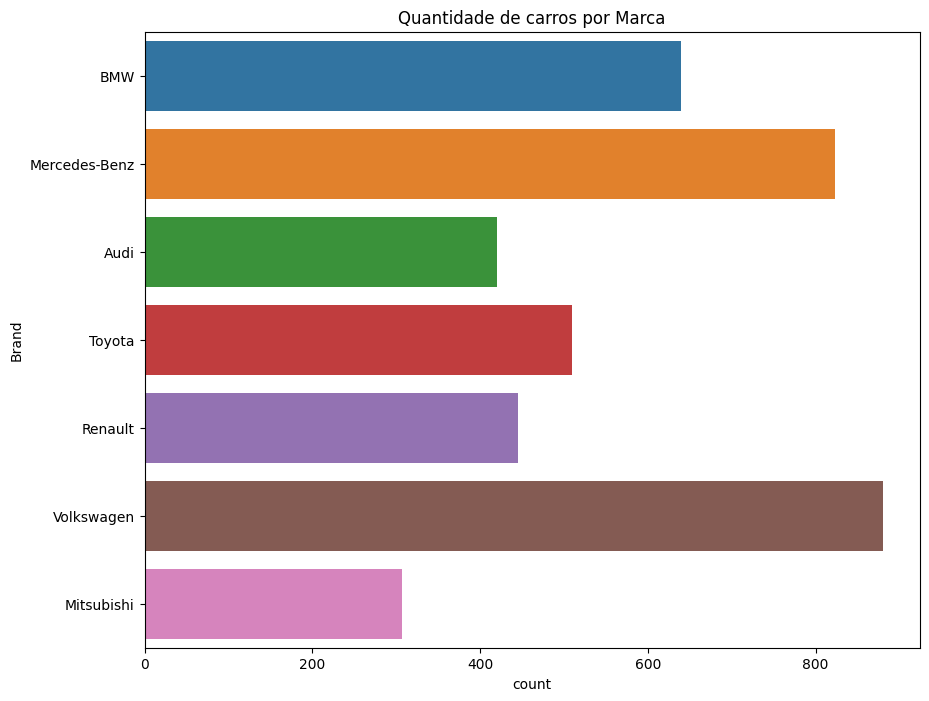

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(y='Brand', data=data)
plt.title('Quantidade de carros por Marca')

**Matriz de Correlação**



Matriz de correlação: 


<ipython-input-15-da7e9679d6c2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation = data.corr()


,Price,Mileage,EngineV,Year
Price,1.000000,-0.473523,0.058664,0.485734
Mileage,-0.473523,1.000000,0.024935,-0.664573
EngineV,0.058664,0.024935,1.000000,-0.030321
Year,0.485734,-0.664573,-0.030321,1.000000


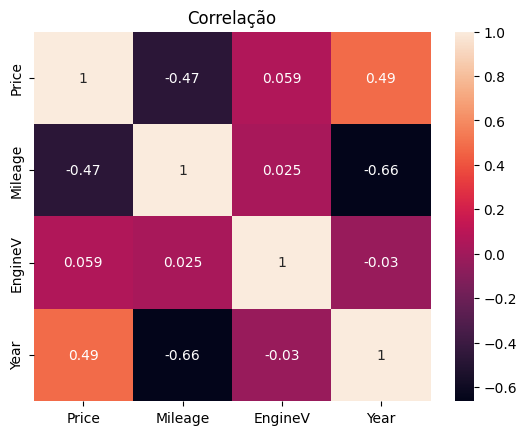

In [15]:
# criando uma matriz X com os valores do data frame
X = data.iloc[:,:-1].values # exceto a coluna da classe (a última = -1)

df_correlation = data.corr()

print('\n\nMatriz de correlação: ')
display(df_correlation)

# cria um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, annot=True,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

Analisando a matriz de correlçãõ podemos analisar que há uma correlação positiva moderada entre o Price (preço) e o Year (ano), o que confirma o fato de que carros mais novos tendem a ser mais caros.

A correlação entre o Price e a Mileage (quilometragem) é negativa, indicando que carros com maior quilometragem tendem a ser mais baratos.

O EngineV (volume do motor) tem uma correlação positiva leve com o Price, sugerindo que carros com motores maiores podem ter um preço um pouco mais alto, mas a relação não é tão forte.

E a Mileage (quilometragem) está negativamente correlacionada com o Year, o que significa que carros mais novos tendem a ter menos quilometragem.

###Variável Registro (Registration)

Análise de se o veiculo for registrado esta impactando no preço.

Text(0, 0.5, 'Price')

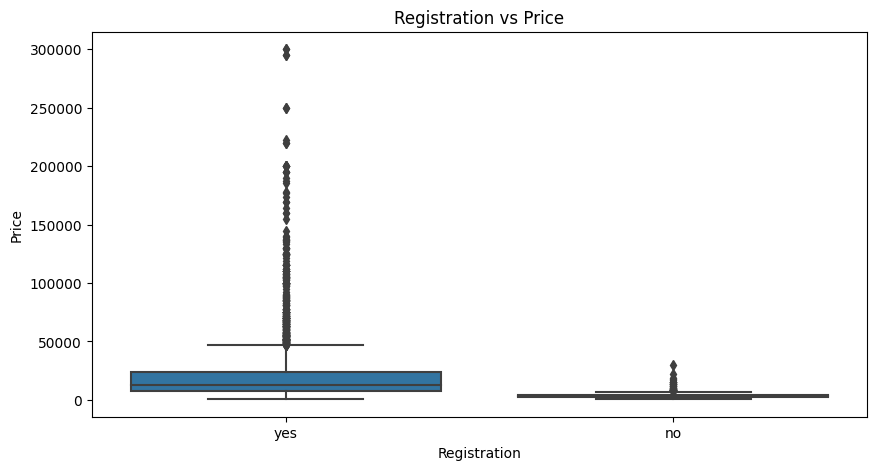

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Registration'], y=data['Price'])
plt.title('Registration vs Price')
plt.xlabel('Registration')
plt.ylabel('Price')


In [17]:
print('Quantidade:', Counter(data['Registration']))

Quantidade: Counter({'yes': 3654, 'no': 371})


Como a variavél de Registration possui muitos poucos dados como Não (No) e pelos dados analisados no boxplot verificamos que essa variavél possui "pouco" impacto quanto ao preeço.

###Variável Modelo (Model)

Como a gente analisou que a Marca (Brand) possui um impacto consideravel para o preço do veículo e por conta do conhecimento heurístico, seguimos para a análise do Modelo (Model) para avaliar a correlação com o preço.

In [18]:
# Verificando o número de modelos únicos no conjunto de dados
print("Qtd Modelo unico: ", data['Model'].nunique())

Qtd Modelo unico:  306


Como possuimos 306 tipos difeenrte de modelos, vamos realizar um filtro para obter apebnas os 10 modelos mais comuns, pois devem englobar os dados mais reelvantes

In [19]:
# contagem de frequência dos modelos
contador_modelo = data['Model'].value_counts()
contador_modelo.head(10)

E-Class               188
A6                    156
Vito                  156
Kangoo                136
Camry                 127
Caddy                 111
X5                    111
Megane                 85
520                    76
Land Cruiser Prado     75
Name: Model, dtype: int64

Text(0, 0.5, 'Frequência')

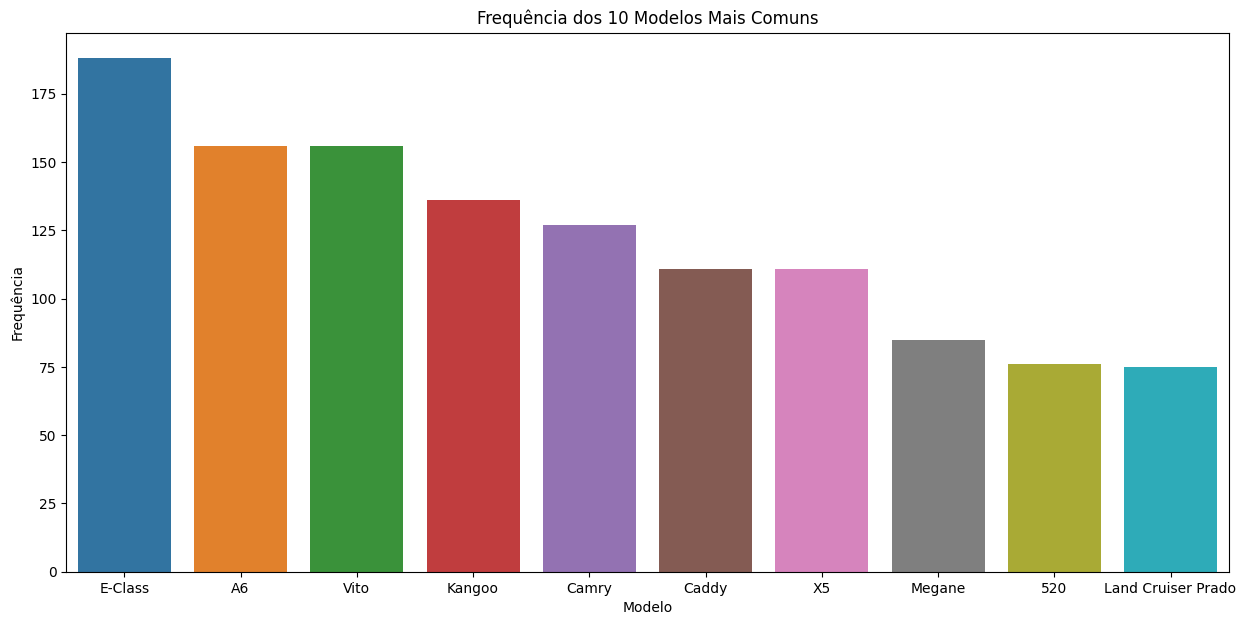

In [20]:
# Selecionando os 10 modelos mais comuns
top_10_modelos = contador_modelo.head(10)

plt.figure(figsize=(15, 7))
sns.barplot(x=top_10_modelos.index, y=top_10_modelos.values)
plt.title('Frequência dos 10 Modelos Mais Comuns')
plt.xlabel('Modelo')
plt.ylabel('Frequência')

Text(0.5, 1.0, 'Distribuição de Preços para os 10 Modelos Mais Comuns')

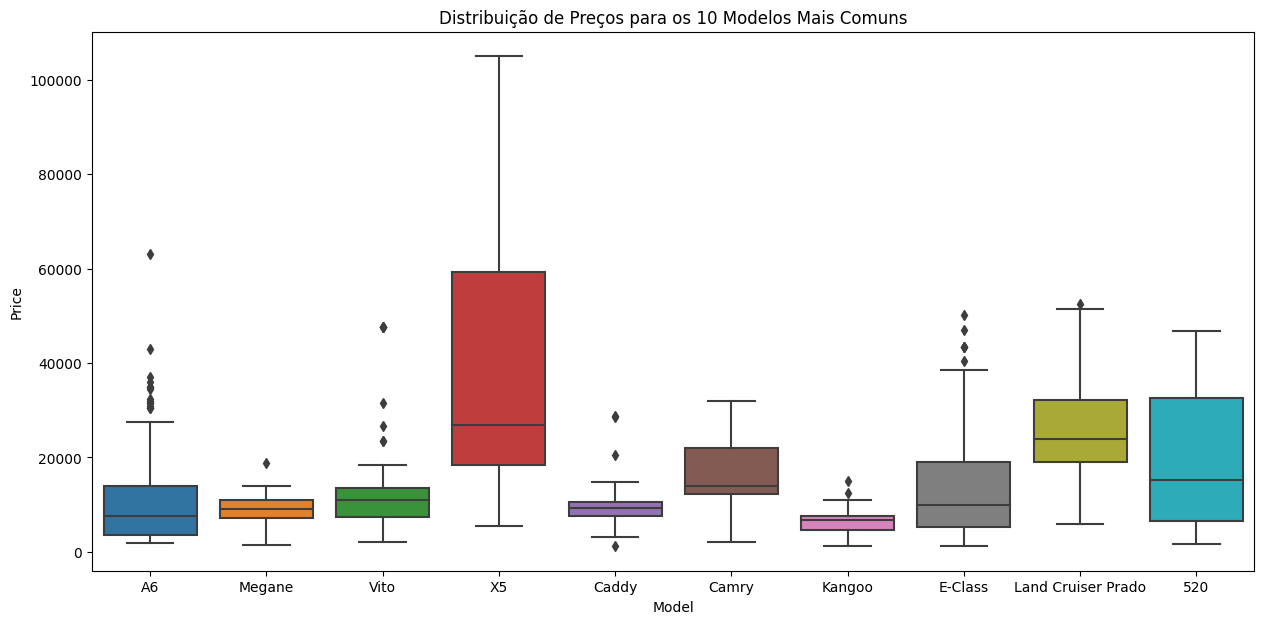

In [21]:
data_top_10_modelos = data[data['Model'].isin(top_10_modelos.index)]

plt.figure(figsize=(15, 7))
sns.boxplot(x='Model', y='Price', data=data_top_10_modelos)
plt.title('Distribuição de Preços para os 10 Modelos Mais Comuns')


In [22]:
# Calculando estatísticas agregadas por modelo
data_top_10_modelos.groupby('Model')['Price'].agg(['mean', 'std', 'count']).sort_values(by='count', ascending=False)

,mean,std,count
Model,,,
E-Class,13002.117021,10204.530449,188
A6,10843.288462,10139.567361,156
Vito,11638.121795,7357.393860,156
Kangoo,6387.308824,2093.133768,136
Camry,16128.102520,6560.030636,127
Caddy,9363.446667,3634.693898,111
X5,35893.966216,22249.546835,111
Megane,9041.830000,2784.436375,85
520,19936.950658,14494.490111,76


**Comparação entre Modelos**: Alguns modelos têm medianas de preços  mais altas do que outros, como o 'X5' em comparação com o 'Kangoo' por exemplo. Dandos indicios de que o modelo pode ser um dado muito importante para a nossa análise de preço.

**Outliers de Preços**: Existem vários outliers de preços, o que indica que há alguns veículos que são vendidos por um preço muito mais alto do que a média para esse modelo. Alguns dos insights que pensamos deve ser por conta de algum  fator de condição excepcional, baixa quilometragem, edições especiais ou ano do carro.

O modelo X5 por exemplo tem o preço médio mais alto entre os 10 modelos e também apresenta a maior variação de preços (desvio padrão alto), o que pode indicar uma diversidade de versões, anos, e níveis de acabamento dentro deste modelo.

Essas informações confirmam que o modelo do carro é uma variável com impacto significativo no preço e deve ser considerada na análise do modelo preditivo. E melhorar a precisão das previsões ao capturar a variação dos preços que está associada a cada modelo específico

###Variavel Versão do Motor (EngineV)

Análise de como a versão do motor se comporta mediante ao preço para verificar se é uma variavel interessante para ser inclusa em nosso modelo de previsão.

Text(0, 0.5, 'Price')

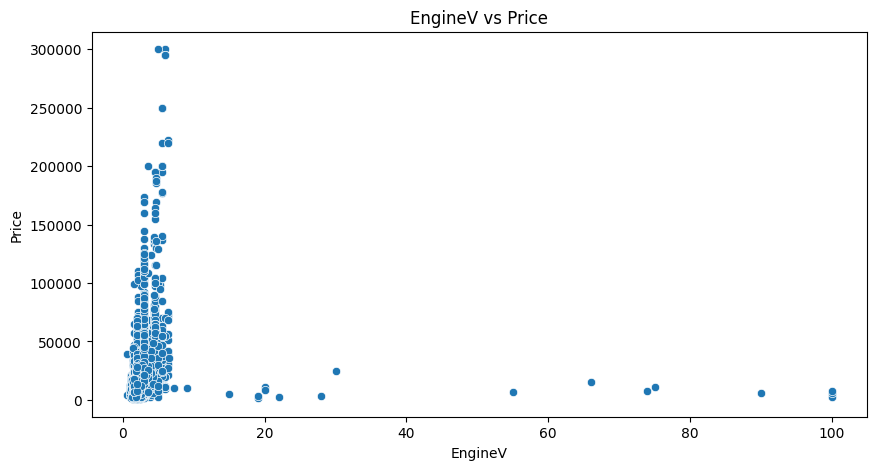

In [23]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['EngineV'], y=data['Price'])
plt.title('EngineV vs Price')
plt.xlabel('EngineV')
plt.ylabel('Price')

In [24]:
data.groupby('EngineV')['Price'].agg(['mean', 'std', 'count']).sort_values(by='count', ascending=False)

,mean,std,count
EngineV,,,
2.00,17068.373483,14228.919173,689
3.00,36429.410489,31196.313166,491
2.50,11555.446667,10959.967657,339
1.60,10798.378878,9419.297002,312
2.20,16922.519856,17835.556975,277
...,...,...,...
4.67,129999.000000,NaN,1
4.66,135555.000000,NaN,1
2.17,8500.000000,NaN,1


O gráfico de dispersão para o volume do motor mostra uma tendência muito dispersa, sugerindo que enquanto há uma leve tendência de preços mais altos com volumes de motor maiores, há muita variabilidade. Fora que como a gente esta visualizando que muitos carros estão com a versão do motor semelhantes (entre 0 e 10) têm preços muito difereente como a gente havia analisado antes e pelo desvio padrão, o que pode indicar que outros fatores são mais determinantes para o preço.

###Variavel Tipo de Motor (Engine Type)

Análise de como o tipo do motor se comporta mediante ao preço para verificar se é uma variavel interessante para ser inclusa em nosso modelo de previsão.

Text(0, 0.5, 'Price')

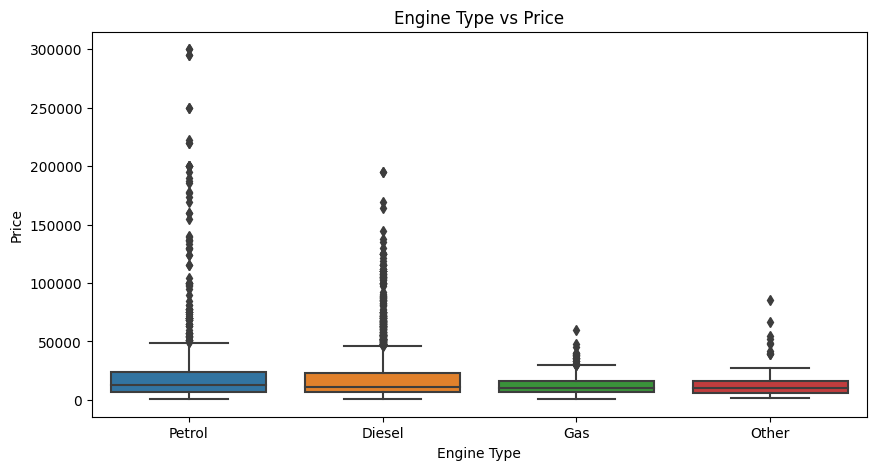

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Engine Type'], y=data['Price'])
plt.title('Engine Type vs Price')
plt.xlabel('Engine Type')
plt.ylabel('Price')

O boxplot para os tipos de motor mostra alguma variação nos preços médios entre diferentes tipos, mas essa variaação não é consistente e há muita sobreeposição entre os quartis. Dessa forma sugerindo que o tipo de motor por si só não é um preditor claro do preço.

### Variável de Tipo de Carroceria (Body)

Análise de se variar o tipo de carroceria, qual sera o seu impacto sobre o preço

Text(0, 0.5, 'Price')

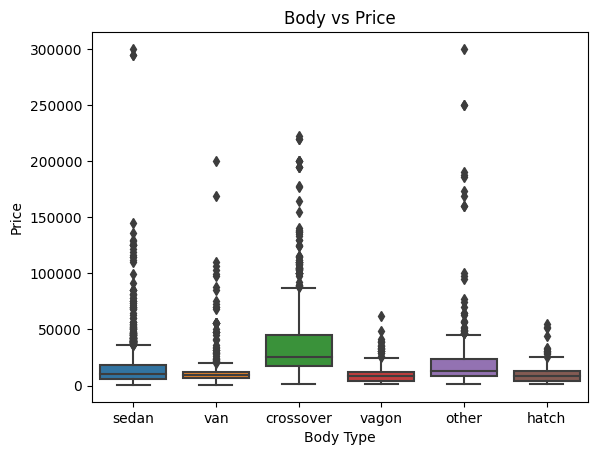

In [27]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Body'], y=data['Price'])
plt.title('Body vs Price')
plt.xlabel('Body Type')
plt.ylabel('Price')

In [29]:
print('Quantidade:', Counter(data['Body']))

Quantidade: Counter({'sedan': 1534, 'crossover': 824, 'van': 626, 'other': 394, 'vagon': 379, 'hatch': 268})


Os boxplots para os tipos de carroceria mostram diferenças entre os tipos de carroceria, mas há uma grande sobreposição nos intervaloss de preço entre eles. Com tudo podemos dizer que o tipo de carroceria tem o seu impacto no preço, porém tendo em vista que as variaveis modelo e marca analisadas anteriormente estão melhor definidas, acreditamos que o Tipo de Carroceria (Body), possa ser omitido de nosso modelo.

##Conclusão da Análise Exploratória

Após a realização da análise exploratória, decidimos continuar com as variáveis "Year", "Mileage", "Brand" e "Model" (Ano, Quilometragem, Marca e Modelo), considerando-as relevantes para a previsão de preços de veículos usados.

* Marca (Brand): Com variações significativas nos preços entre diferentes marcas, esta variável se mostrou crucial para entender a segmentação de mercado e as estratégias de precificação. No entanto, a análise se concentrou nas marcas mais frequentes (as 10 com mais registos em nossa base de dados).

* Modelo (Model): A inclusão do modelo do carro na análise revelou diferenças substanciais nos preços, sugerindo que é uma variável significativa que reflete características específicas dos veículos, como luxo, desempenho e recursos.

* Ano do Veículo (Year): Demonstrou uma correlação negativa moderada com a quilometragem, o que é intuitivo, pois veículos mais novos tendem a ter menos quilômetros rodados. Essa variável é importante para prever preços, refletindo a depreciação ao longo do tempo.

* Quilometragem (Mileage): Apresentou uma correlação negativa com o preço, sugerindo que maior quilometragem está associada a preços menores. Essa variável é valiosa para modelar a depreciação e avaliar o valor de um veículo com base no uso.

Etapas realizadas:

* Análise das Variáveis Numéricas: Examinamos estatísticas descritivas para "Year" e "Mileage".
* Análise de Variáveis Categóricas: Avaliamos "Brand" e "Model", observando a frequência e a influência no preço.
* Correlação entre Variáveis: Analisamos a correlação, incluindo a codificação da variável categórica "Brand".
* Visualizações de Dados: Criamos gráficos para entender a distribuição de preços e a frequência dos modelos.




Decisão sobre outras variáveis:

Outras variáveis, como "EngineV", "Engine Type", "Registration" e "Body", foram examinadas por meio de visualizações gráficas e não mostraram uma relação clara com o preço ou eram potencialmente redundantes com as variáveis selecionadas (principalmente por conta das variaveis de Marca e Modelo (Brand e Model, respectivamente). Essa decisão foi baseada na busca por um modelo mais simples e interpretável e concentrando-se nas variáveis com maior impacto no preço.

Com essas informações, a análise exploratória foi concluída, fornecendo uma base sólida para as etapas subsequentes de modelagem.